In [31]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [32]:
class agentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    result1: int
    result2: int

In [33]:
def adder1(state: agentState) -> agentState:
    state["result1"] = state["number1"] + state["number2"]
    return state

def adder2(state: agentState) -> agentState:
    state["result1"] = state["number3"] + state["number4"]
    return state

def sub1(state: agentState) -> agentState:
    state["result2"] = state["number1"] - state["number2"]
    return state

def sub2(state: agentState) -> agentState:
    state["result2"] = state["number3"] - state["number4"]
    return state


# DECIDER NODE 1
def decider_node_1(state: agentState) -> agentState:
    if state["operation1"] == "+":
        return "addition_operation1" # Edge to addition node 
    
    elif state["operation1"] == "-":
        return "subtraction_operation1" # Edge to subtraction node 
    
# DECIDER NODE 2
def decider_node_2(state: agentState) -> agentState:
    if state["operation2"] == "+":
        return "addition_operation2" # Edge to addition node 
    
    elif state["operation2"] == "-":
        return "subtraction_operation2" # Edge to subtraction node 

In [34]:
graph = StateGraph(agentState)

graph.add_node("adder1", adder1)
graph.add_node("sub1", sub1)
graph.add_node("adder2", adder2)
graph.add_node("sub2", sub2)

graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1", 
    decider_node_1,
    {
        "addition_operation1" : "adder1",
        "subtraction_operation1" : "sub1"
    }
)

graph.add_edge("adder1","router2")
graph.add_edge("sub1", "router2")
graph.add_conditional_edges(
    "router2", 
    decider_node_2,
    {
        "addition_operation2" : "adder2",
        "subtraction_operation2" : "sub2"
    }
)
graph.add_edge("adder2", END)
graph.add_edge("sub2", END)

app = graph.compile()

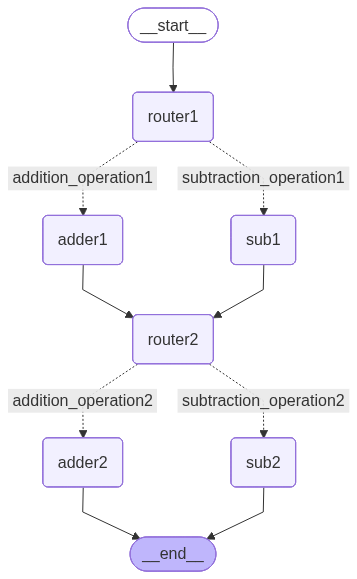

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result = app.invoke({
    "number1" : 10,
    "number2" : 5,
    "number3" : 7,
    "number4" : 2,
    "operation1" : "-",
    "operation2" : "+"
})


result["result1"] #5 
result["result2"] #9

5